# Classification of Iris
Iris Species

Analysis by: Sulchan Yoon

Class: Data430 University of Maryland Global Campus

### Review of the Dataset

### The Data

| Column Number | Column Heading | Definition                            |
|---------------|----------------|---------------------------------------|
| 1             | ID             | Object Identifier                     |
| 2             | SepalLengthCm  | Length in Cm of the Sepal of the Iris |
| 3             | SepalWidthCm   | Width in Cm of the Sepal of the Iris  |
| 4             | PetalLengthCm  | Length in Cm of the Petal of the Iris |
| 5             | PetalWidthCm   | Width in Cm of the Petal of the Iris  |
| 6             | Species        | Categorical Species of the Iris       |


### Our Goal


### Initiation

In [1]:
# Import all necessary packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# For the Machine Learning Algorithms used in these projects
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score
from IPython.display import SVG
from IPython.display import display
from graphviz import Source

# From Professor's notes
from sklearn import metrics
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

In [2]:
iris_df = pd.read_csv("IRIS.csv")

In [3]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris_df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [ ]:
iris_df.summar

In [6]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### EDA

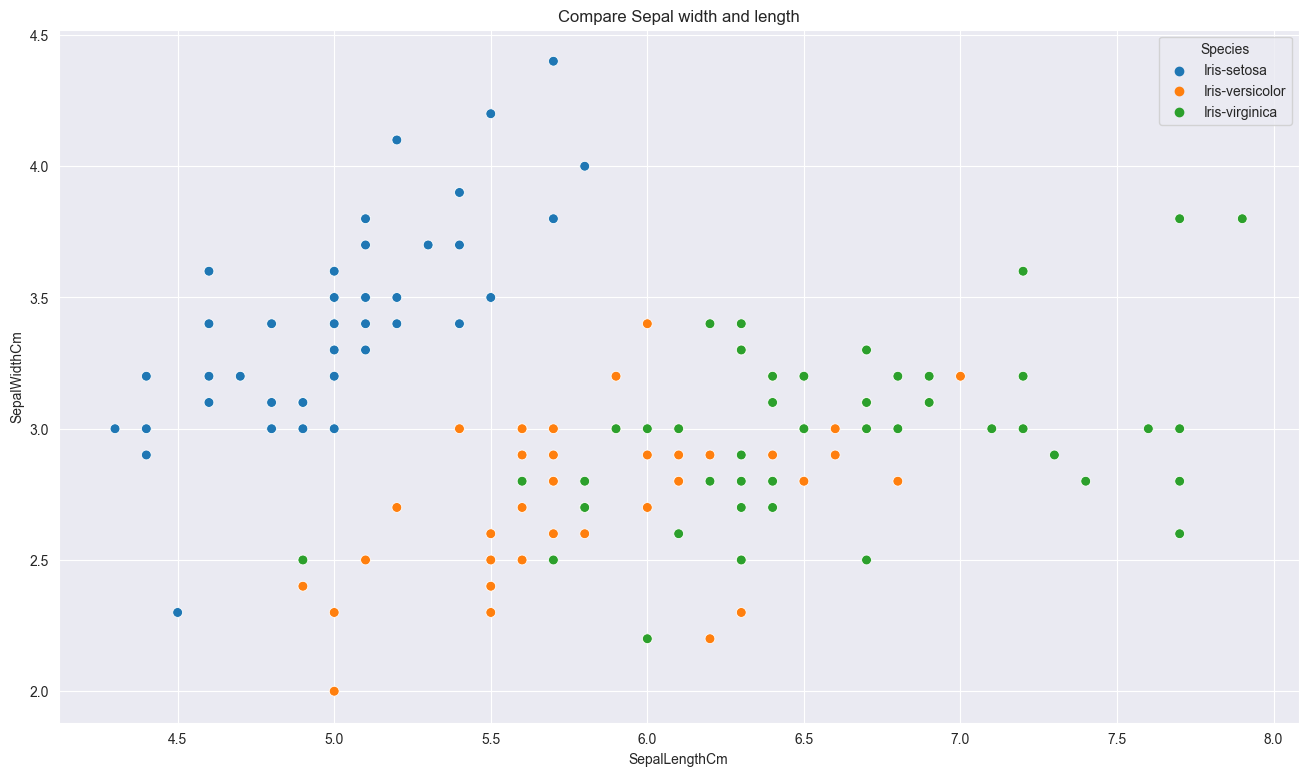

In [7]:
plt.figure(figsize=(16,9))
plt.title('Compare Sepal width and length')
sns.scatterplot(data = iris_df, x='SepalLengthCm', y='SepalWidthCm', hue = iris_df['Species'], s= 50);

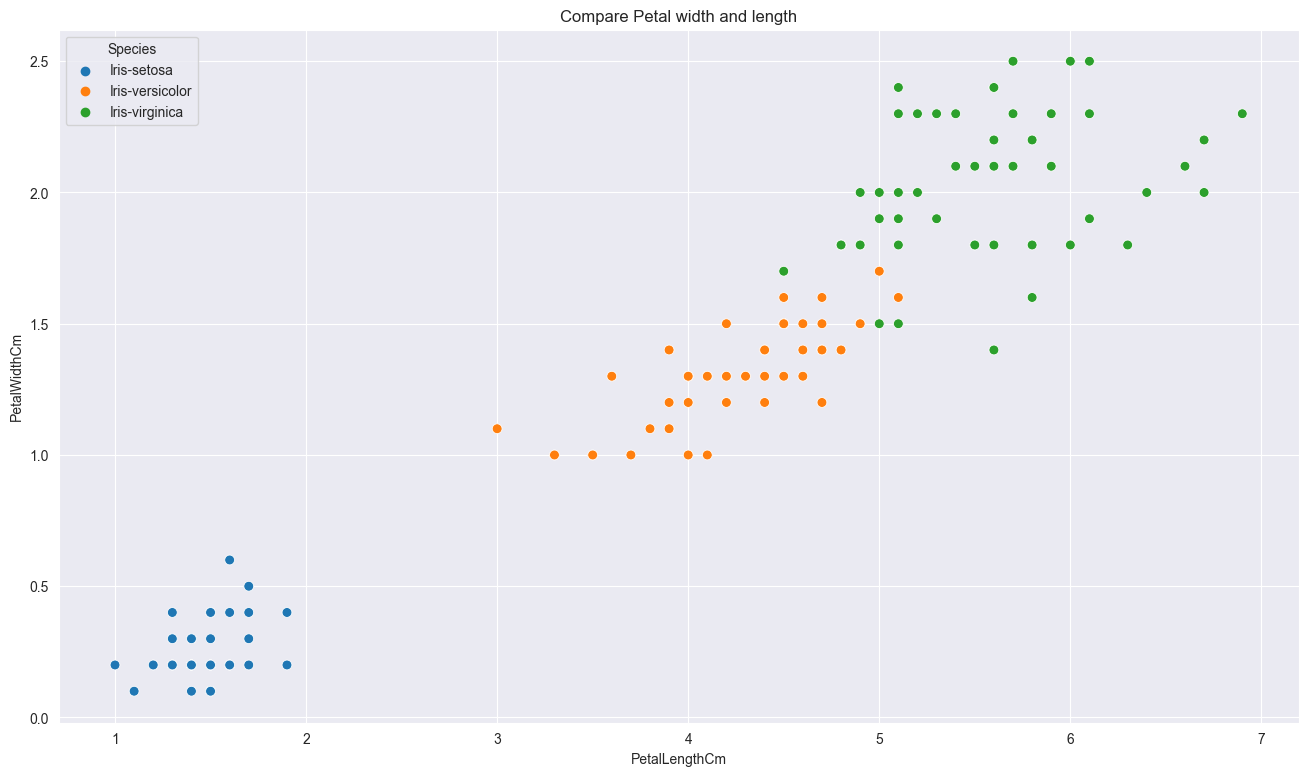

In [8]:
plt.figure(figsize=(16,9))
plt.title('Compare Petal width and length')
sns.scatterplot(data = iris_df, x='PetalLengthCm', y='PetalWidthCm', hue = iris_df['Species'], s= 50);

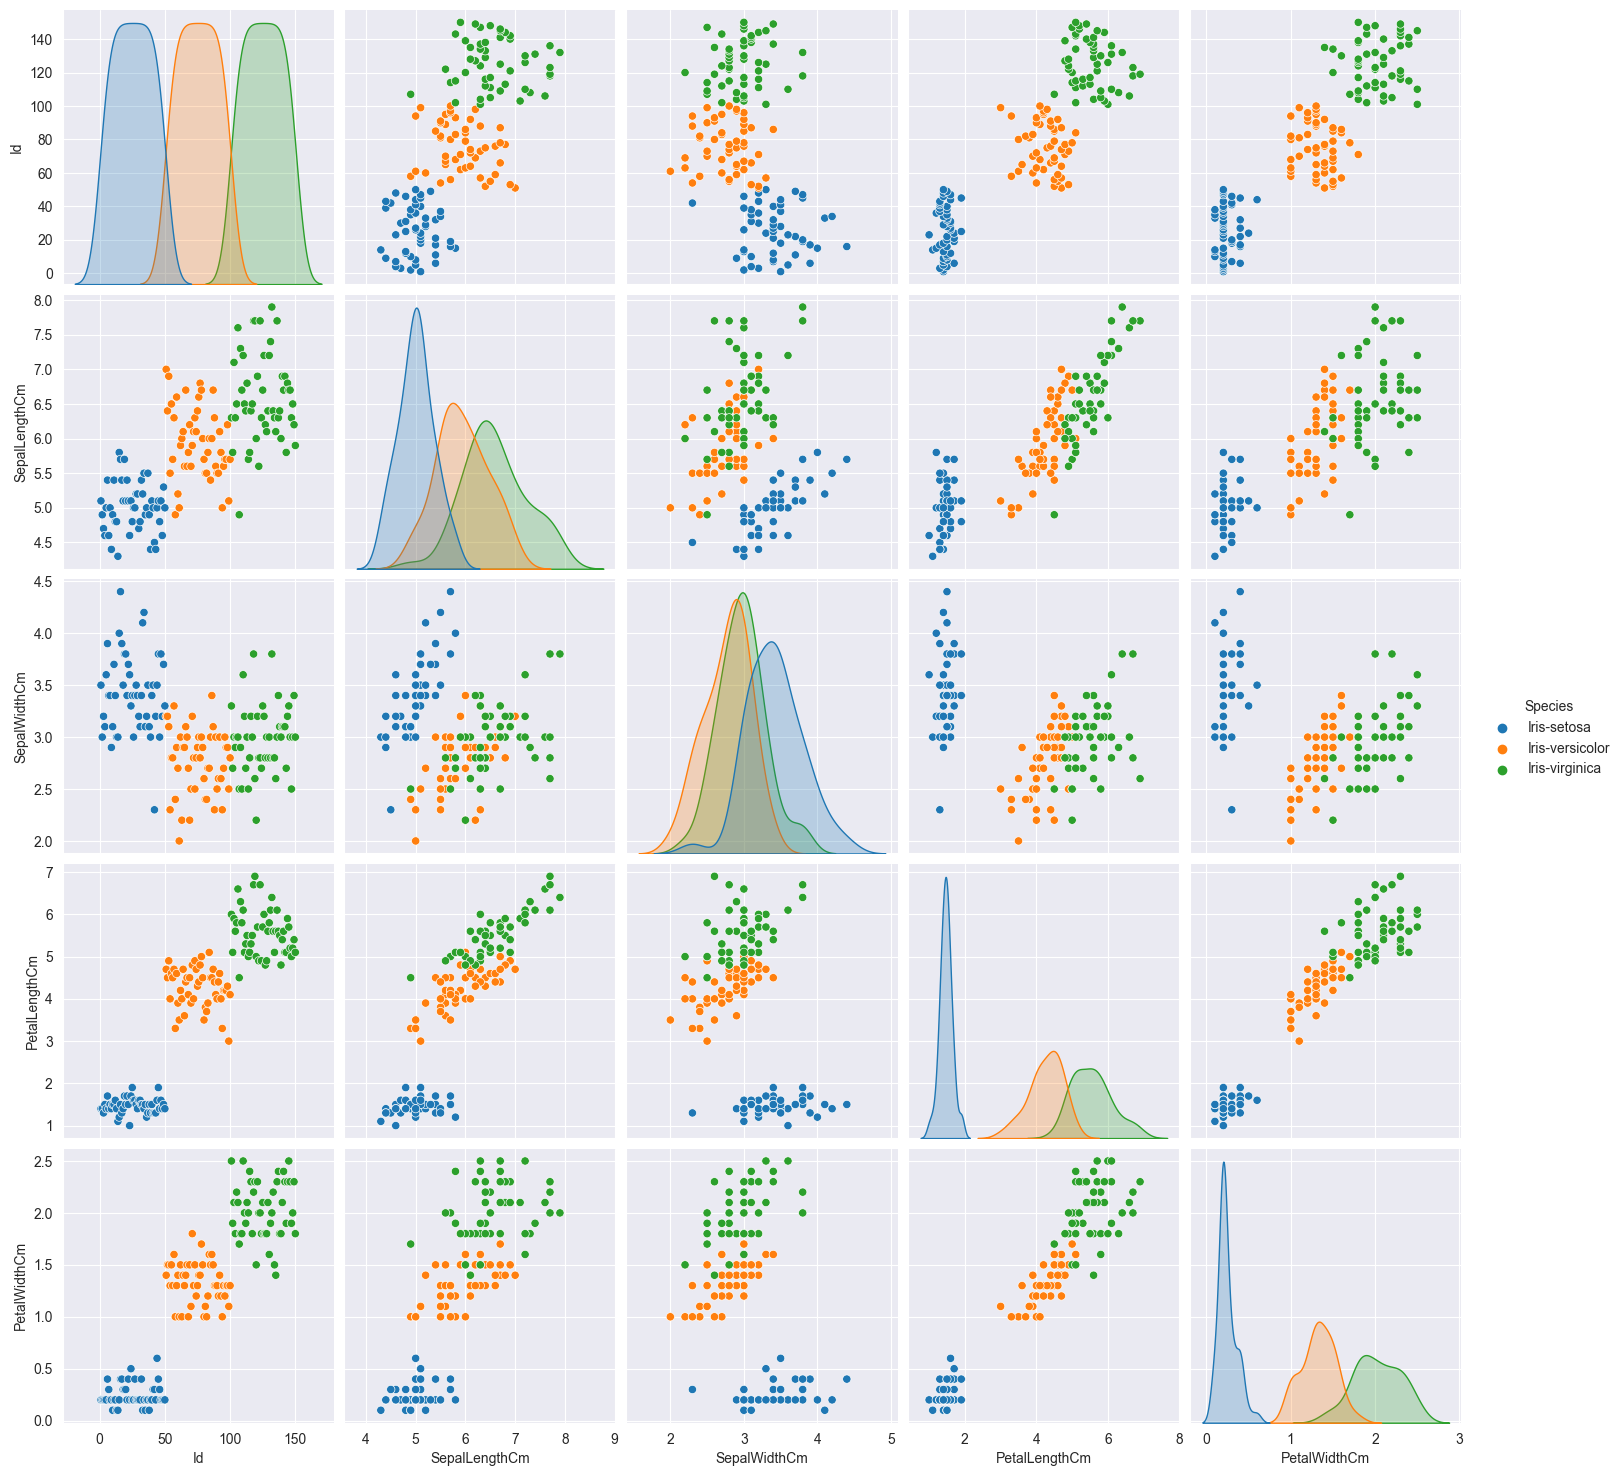

In [9]:
sns.pairplot(iris_df,hue="Species",height=3);

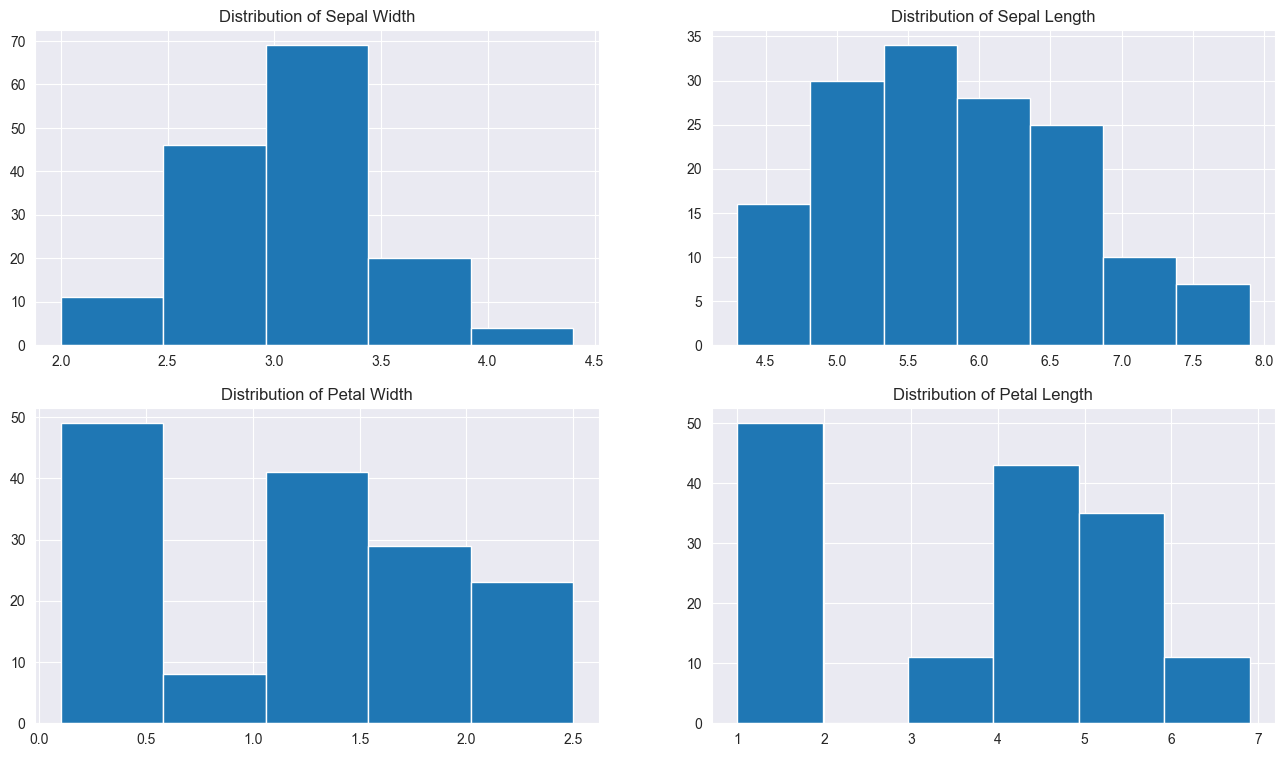

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
axes[0,0].set_title("Distribution of Sepal Width")
axes[0,0].hist(iris_df['SepalWidthCm'], bins=5);
axes[0,1].set_title("Distribution of Sepal Length")
axes[0,1].hist(iris_df['SepalLengthCm'], bins=7);
axes[1,0].set_title("Distribution of Petal Width")
axes[1,0].hist(iris_df['PetalWidthCm'], bins=5);
axes[1,1].set_title("Distribution of Petal Length")
axes[1,1].hist(iris_df['PetalLengthCm'], bins=6);

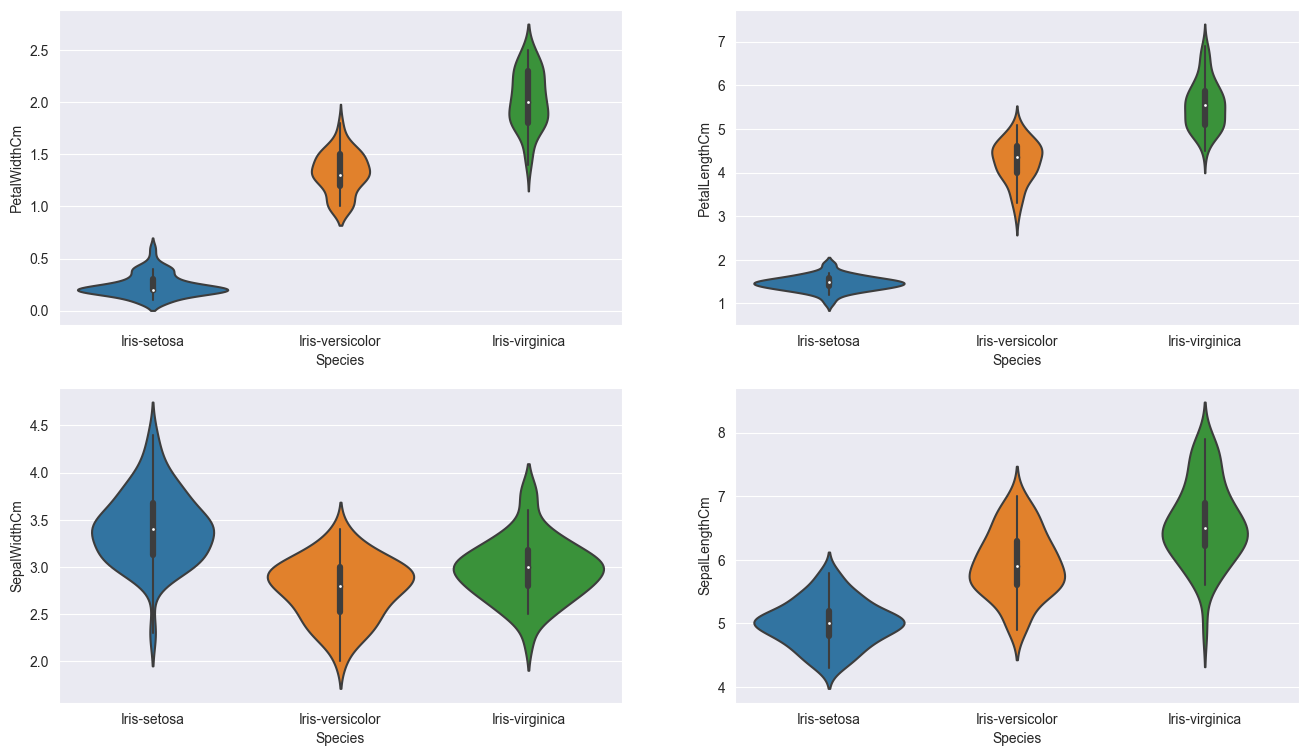

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.violinplot(y="PetalWidthCm", x= "Species", data=iris_df,  orient='v' , ax=axes[0, 0])
sns.violinplot(y="PetalLengthCm", x= "Species", data=iris_df,  orient='v' , ax=axes[0, 1])
sns.violinplot(y="SepalWidthCm", x= "Species", data=iris_df,  orient='v' , ax=axes[1, 0])
sns.violinplot(y="SepalLengthCm", x= "Species", data=iris_df,  orient='v' , ax=axes[1, 1])
plt.show()

### Data Preprocessing

In [12]:
iris_df = iris_df.drop("Id", axis = 1)

In [13]:
iris_df.head().style.background_gradient(cmap = 'RdBu')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5.000000,3.600000,1.400000,0.200000,Iris-setosa


In [14]:
X = iris_df.drop(['Species'],axis=1)
y = iris_df['Species']

In [15]:
le = LabelEncoder()

In [16]:
y = le.fit_transform(y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 10)

In [18]:
irisTree = DecisionTreeClassifier(random_state = 10, splitter = 'random')

irisTree.fit(X_train, y_train)
y_predTree = irisTree.predict(X_test)

In [25]:
irisTree

DecisionTreeClassifier(random_state=10, splitter='random')

In [19]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predTree))

DecisionTrees's Accuracy:  0.9666666666666667


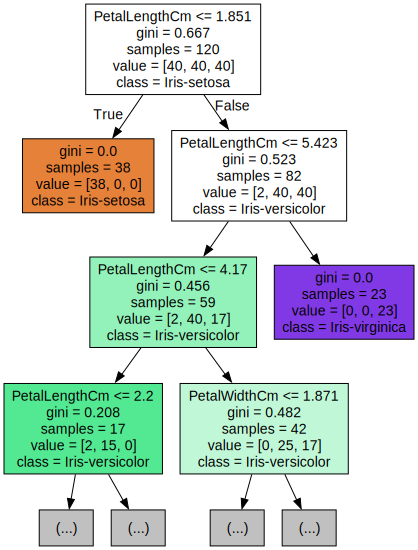

In [24]:
labels = X.columns
irisdfy = iris_df.Species
filename = "iristree.png"
graph = Source(tree.export_graphviz(irisTree ,feature_names = labels, class_names = irisdfy.unique(), max_depth = 3, filled = True))
display(SVG(graph.pipe(format='svg')))